In [1]:
from susie import susie
from susie_plots import susie_plot
from univariate_regression import univariate_regression
import numpy as np
import pandas as pd
from susie_utils import susie_get_cs, susie_get_pip

In [2]:
base_path = "./datasets/"
x_file = f"{base_path}N2finemapping_X.csv"
y_file = f"{base_path}N2finemapping_Y.csv"
true_coef_file = f"{base_path}N2finemapping_true_coef.csv"

# 读取数据
X = pd.read_csv(x_file).values
Y = pd.read_csv(y_file).values
true_coef = pd.read_csv(true_coef_file).values
y = Y[:, 0]
b = true_coef[:, 0]
print(np.where(b != 0)[0])
# 打印数据形状以确认读取正确
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"true_coef shape: {true_coef.shape}")



[336 998]
X shape: (574, 1002)
Y shape: (574, 2)
true_coef shape: (1002, 2)


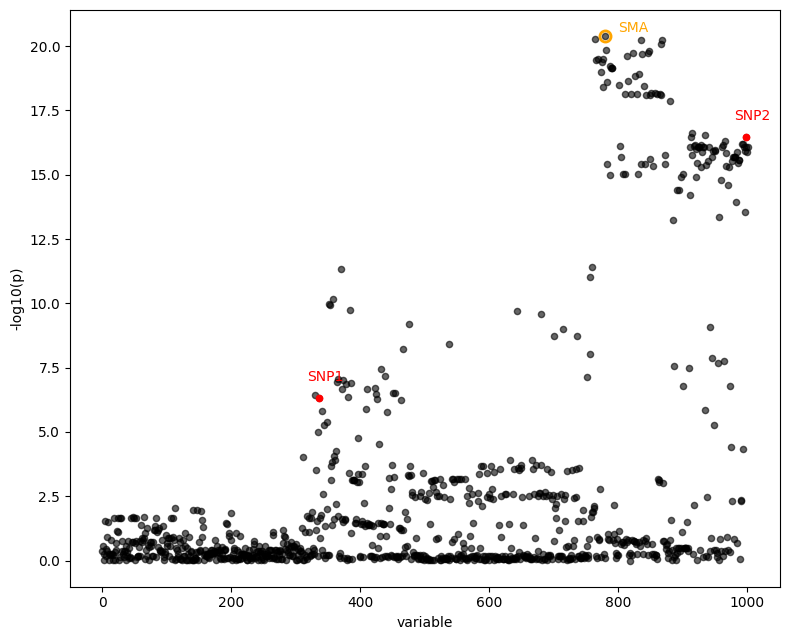

In [3]:
from scipy.stats import norm
sumstats = univariate_regression(X, y)
z_scores = sumstats['betahat'] / sumstats['sebetahat']
plot = susie_plot(z_scores, y = "z", b=b, add_legend=True)

# 获取图形中的axes对象
ax = plot.get_axes()[0]  

# 找出true_coef不为0的位置
true_snp_idx = np.where(b != 0)[0]

# 计算-log10(p)值
zneg = -np.abs(z_scores)
p_values = -np.log10(2 * norm.cdf(zneg))

# 在这些位置标注SNP1和SNP2，使用红色
for i, idx in enumerate(true_snp_idx):
    ax.annotate(f'SNP{i+1}', 
                xy=(idx-40, p_values[idx]), 
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                color='red')  # 红色文字

# 找出z值最高的位置并标注SMA，使用橙色
max_z_idx = np.argmax(np.abs(z_scores))
# 添加空心圈
ax.plot(max_z_idx, p_values[max_z_idx], 
        color='orange',           # 边框颜色
        marker='o',               # 圆形
        markersize=8,            # 圆的大小
        markerfacecolor='none',   # 设置为空心
        markeredgewidth=2,        # 边框宽度
        linestyle='none')         # 只画点，不画线
# 添加SMA标注
ax.annotate('SMA', 
            xy=(max_z_idx, p_values[max_z_idx]-0.5), 
            xytext=(10, 10),
            textcoords='offset points',
            ha='left',
            va='bottom',
            color='orange')  # 橙色文字

plot.show()

In [4]:
fitted = susie(X=X, y=y, L=10, verbose=True, max_iter=10)

objective: -881.5482599454225
objective: -877.7281357344882
objective: -862.5079996764981
objective: -862.4752089478872
objective: -859.7844197503721
objective: -859.755498915384
objective: -856.7080702340794
objective: -856.6782445785145
objective: -853.8752604626933
objective: -853.8567799407137
objective: -851.4754881882335
objective: -851.4675261261286
objective: -849.5609324024477
objective: -849.5587113853954
objective: -848.3263521438087
objective: -848.3254787756368
objective: -846.4939652190203
objective: -846.4921525036866
objective: -845.7000381412389
objective: -845.6999753393746


In [5]:
sets = susie_get_cs(fitted, X=X, coverage=0.9, min_abs_corr=0.1)
print(sets)

{'cs': {'L2': array([336]), 'L1': array([ 912,  913,  914,  915,  919,  924,  925,  926,  929,  930,  932,
        933,  934,  941,  947,  950,  951,  961,  966,  967,  978,  979,
        982,  984,  992,  993,  995,  998,  999, 1000, 1001])}, 'purity':    min.abs.corr  mean.abs.corr  median.abs.corr
2      1.000000       1.000000         1.000000
1      0.982231       0.995179         0.995826, 'cs_index': array([2, 1]), 'coverage': array([0.9016791 , 0.90643082]), 'requested_coverage': 0.9}


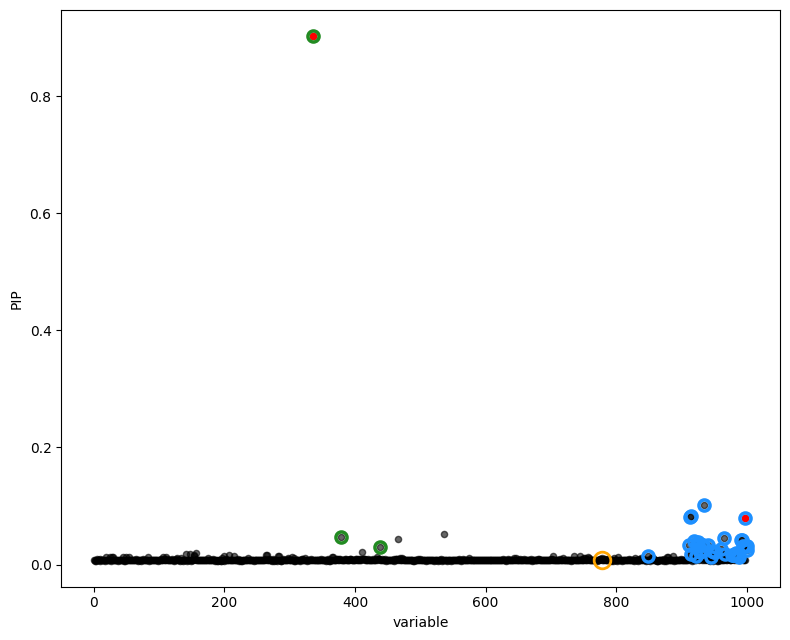

In [6]:
# 先获取最大z值的位置（之前SMA的位置）
sumstats = univariate_regression(X, y)
z_scores = sumstats['betahat'] / sumstats['sebetahat']
max_z_idx = np.argmax(np.abs(z_scores))

# 画SuSiE的PIP图
plot = susie_plot(fitted, y = "PIP", b=b, add_legend=True)
ax = plot.get_axes()[0]

# 在SMA位置添加橙色空心圈
ax.plot(max_z_idx, fitted.pip[max_z_idx], 
        color='orange',           # 边框颜色
        marker='o',               # 圆形
        markersize=12,            # 圆的大小
        markerfacecolor='none',   # 设置为空心
        markeredgewidth=2,        # 边框宽度
        linestyle='none')         # 只画点，不画线

plot.show()